In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/traffic/traffic_accidents.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("/kaggle/input/traffic/traffic_accidents.csv")
df

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8
2,12/09/2021 10:30:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,10,5,12
3,08/09/2023 07:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,5.0,0.0,0.0,5.0,0.0,0.0,19,4,8
4,08/19/2023 02:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,14,7,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209301,09/13/2023 01:08:00 PM,UNKNOWN,UNKNOWN,UNKNOWN,TURNING,FOUR WAY,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,13,4,9
209302,07/18/2023 02:10:00 PM,UNKNOWN,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,14,3,7
209303,10/23/2019 01:32:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,PEDESTRIAN,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT ON GRADE,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,INCAPACITATING INJURY,2.0,0.0,2.0,0.0,0.0,0.0,13,4,10
209304,06/01/2020 03:23:00 PM,NO CONTROLS,CLEAR,DAYLIGHT,PEDESTRIAN,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,1.0,0.0,0.0,1.0,0.0,1.0,15,2,6


In [4]:
df.shape

(209306, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209306 entries, 0 to 209305
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   crash_date                     209306 non-null  object 
 1   traffic_control_device         209306 non-null  object 
 2   weather_condition              209306 non-null  object 
 3   lighting_condition             209306 non-null  object 
 4   first_crash_type               209306 non-null  object 
 5   trafficway_type                209306 non-null  object 
 6   alignment                      209306 non-null  object 
 7   roadway_surface_cond           209306 non-null  object 
 8   road_defect                    209306 non-null  object 
 9   crash_type                     209306 non-null  object 
 10  intersection_related_i         209306 non-null  object 
 11  damage                         209306 non-null  object 
 12  prim_contributory_cause       

In [6]:
df.describe()

,num_units,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
count,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000
mean,2.063300,0.382717,0.001859,0.038102,0.221241,0.121516,2.244002,13.373047,4.144024,6.771822
std,0.396012,0.799720,0.047502,0.233964,0.614960,0.450865,1.241175,5.603830,1.966864,3.427593
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,9.000000,2.000000,4.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,14.000000,4.000000,7.000000
75%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,17.000000,6.000000,10.000000
max,11.000000,21.000000,3.000000,7.000000,21.000000,15.000000,49.000000,23.000000,7.000000,12.000000


In [7]:
df.describe(include="all")

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
count,209306,209306,209306,209306,209306,209306,209306,209306,209306,209306,...,209306,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000
unique,189087,19,12,6,18,20,6,7,7,2,...,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,12/29/2020 05:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,10,123944,164700,134109,64157,77753,204590,155905,171730,117376,...,154789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.382717,0.001859,0.038102,0.221241,0.121516,2.244002,13.373047,4.144024,6.771822
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.799720,0.047502,0.233964,0.614960,0.450865,1.241175,5.603830,1.966864,3.427593
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,9.000000,2.000000,4.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,14.000000,4.000000,7.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,17.000000,6.000000,10.000000


In [8]:
df.isnull().sum()

crash_date                       0
traffic_control_device           0
weather_condition                0
lighting_condition               0
first_crash_type                 0
trafficway_type                  0
alignment                        0
roadway_surface_cond             0
road_defect                      0
crash_type                       0
intersection_related_i           0
damage                           0
prim_contributory_cause          0
num_units                        0
most_severe_injury               0
injuries_total                   0
injuries_fatal                   0
injuries_incapacitating          0
injuries_non_incapacitating      0
injuries_reported_not_evident    0
injuries_no_indication           0
crash_hour                       0
crash_day_of_week                0
crash_month                      0
dtype: int64

In [9]:
df_num=df.select_dtypes(include=[np.number])
df_num

,num_units,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,2,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7
1,2,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8
2,3,0.0,0.0,0.0,0.0,0.0,3.0,10,5,12
3,2,5.0,0.0,0.0,5.0,0.0,0.0,19,4,8
4,2,0.0,0.0,0.0,0.0,0.0,3.0,14,7,8
...,...,...,...,...,...,...,...,...,...,...
209301,2,0.0,0.0,0.0,0.0,0.0,2.0,13,4,9
209302,2,0.0,0.0,0.0,0.0,0.0,2.0,14,3,7
209303,2,2.0,0.0,2.0,0.0,0.0,0.0,13,4,10
209304,2,1.0,0.0,0.0,1.0,0.0,1.0,15,2,6


In [10]:
df_cat=df.select_dtypes(include=["object"])
df_cat

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,intersection_related_i,damage,prim_contributory_cause,most_severe_injury
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,Y,"$501 - $1,500",UNABLE TO DETERMINE,NO INDICATION OF INJURY
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,Y,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,NO INDICATION OF INJURY
2,12/09/2021 10:30:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,Y,"$501 - $1,500",FOLLOWING TOO CLOSELY,NO INDICATION OF INJURY
3,08/09/2023 07:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,Y,"OVER $1,500",UNABLE TO DETERMINE,NONINCAPACITATING INJURY
4,08/19/2023 02:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,Y,"$501 - $1,500",DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,NO INDICATION OF INJURY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209301,09/13/2023 01:08:00 PM,UNKNOWN,UNKNOWN,UNKNOWN,TURNING,FOUR WAY,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,Y,"OVER $1,500",UNABLE TO DETERMINE,NO INDICATION OF INJURY
209302,07/18/2023 02:10:00 PM,UNKNOWN,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,Y,"OVER $1,500",IMPROPER OVERTAKING/PASSING,NO INDICATION OF INJURY
209303,10/23/2019 01:32:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,PEDESTRIAN,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT ON GRADE,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,N,$500 OR LESS,RELATED TO BUS STOP,INCAPACITATING INJURY
209304,06/01/2020 03:23:00 PM,NO CONTROLS,CLEAR,DAYLIGHT,PEDESTRIAN,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,Y,$500 OR LESS,"VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,...",NONINCAPACITATING INJURY


In [11]:
df_m=pd.concat([df_cat,df_num],axis=1)
df_m

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,num_units,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,2,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,2,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8
2,12/09/2021 10:30:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,3,0.0,0.0,0.0,0.0,0.0,3.0,10,5,12
3,08/09/2023 07:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,2,5.0,0.0,0.0,5.0,0.0,0.0,19,4,8
4,08/19/2023 02:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,2,0.0,0.0,0.0,0.0,0.0,3.0,14,7,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209301,09/13/2023 01:08:00 PM,UNKNOWN,UNKNOWN,UNKNOWN,TURNING,FOUR WAY,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,2,0.0,0.0,0.0,0.0,0.0,2.0,13,4,9
209302,07/18/2023 02:10:00 PM,UNKNOWN,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,2,0.0,0.0,0.0,0.0,0.0,2.0,14,3,7
209303,10/23/2019 01:32:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,PEDESTRIAN,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT ON GRADE,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,2,2.0,0.0,2.0,0.0,0.0,0.0,13,4,10
209304,06/01/2020 03:23:00 PM,NO CONTROLS,CLEAR,DAYLIGHT,PEDESTRIAN,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,2,1.0,0.0,0.0,1.0,0.0,1.0,15,2,6


In [12]:
df_num_corr=df_num.corr()
df_num_corr

,num_units,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
num_units,1.000000,0.159857,0.029304,0.070088,0.121650,0.078163,0.188041,0.015629,0.002729,0.003158
injuries_total,0.159857,1.000000,0.097864,0.323319,0.769343,0.546309,-0.320762,-0.015469,-0.015230,0.013508
injuries_fatal,0.029304,0.097864,1.000000,0.049945,0.025832,0.007078,-0.034434,-0.004651,-0.001331,0.002018
injuries_incapacitating,0.070088,0.323319,0.049945,1.000000,0.038507,-0.003220,-0.119906,-0.010266,-0.007388,0.003984
injuries_non_incapacitating,0.121650,0.769343,0.025832,0.038507,1.000000,-0.022040,-0.252953,-0.014130,-0.012242,0.009618
injuries_reported_not_evident,0.078163,0.546309,0.007078,-0.003220,-0.022040,1.000000,-0.158083,-0.002349,-0.006342,0.008562
injuries_no_indication,0.188041,-0.320762,-0.034434,-0.119906,-0.252953,-0.158083,1.000000,0.050867,0.006497,-0.006167
crash_hour,0.015629,-0.015469,-0.004651,-0.010266,-0.014130,-0.002349,0.050867,1.000000,0.062326,0.003379
crash_day_of_week,0.002729,-0.015230,-0.001331,-0.007388,-0.012242,-0.006342,0.006497,0.062326,1.000000,-0.006240
crash_month,0.003158,0.013508,0.002018,0.003984,0.009618,0.008562,-0.006167,0.003379,-0.006240,1.000000


<Axes: >

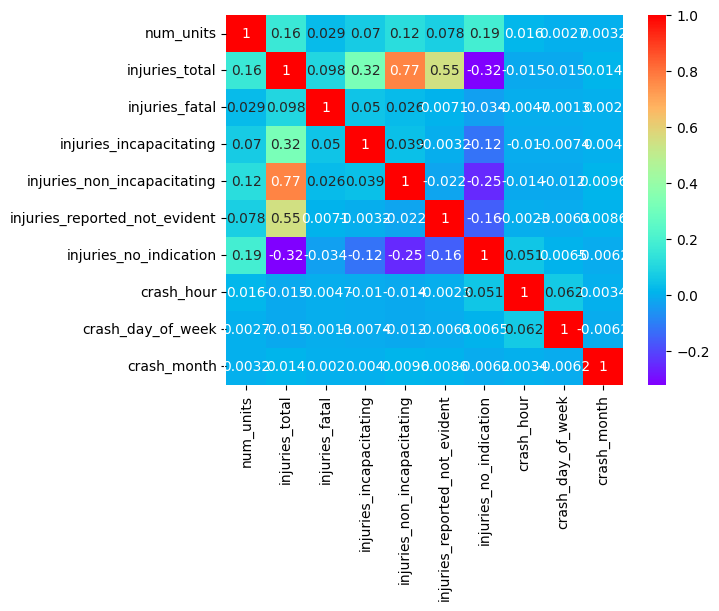

In [13]:
sns.heatmap(df_num_corr,annot=True,cmap="rainbow")

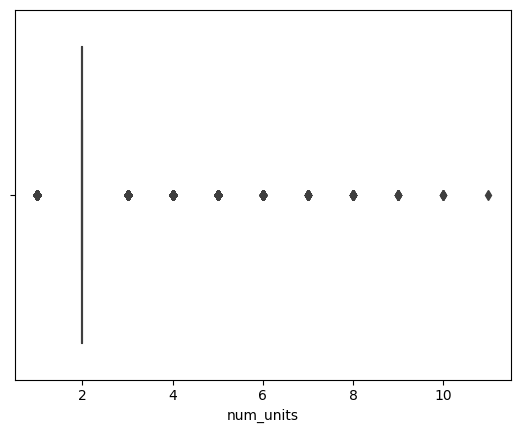

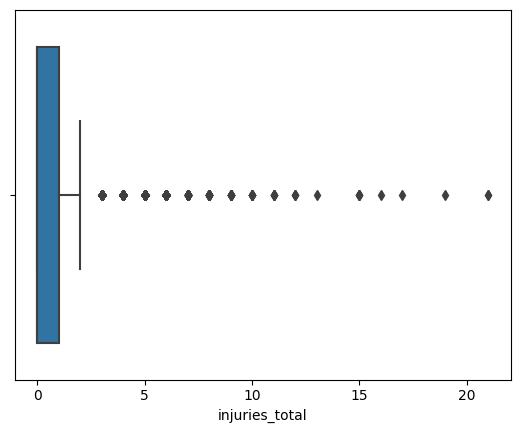

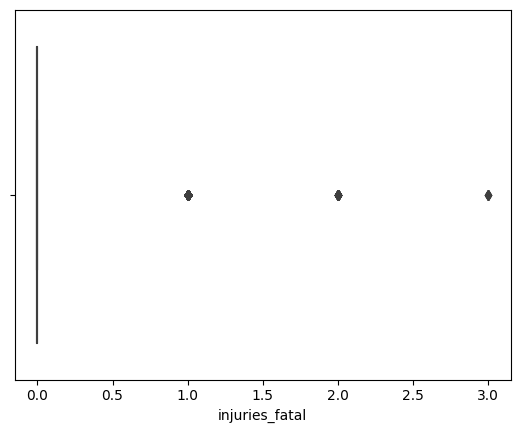

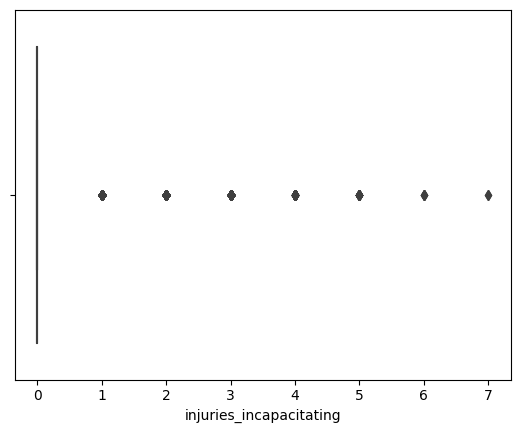

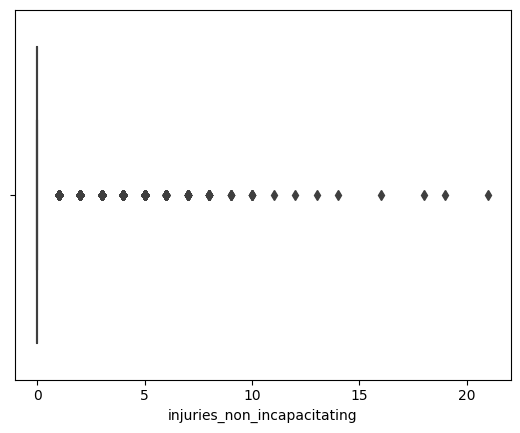

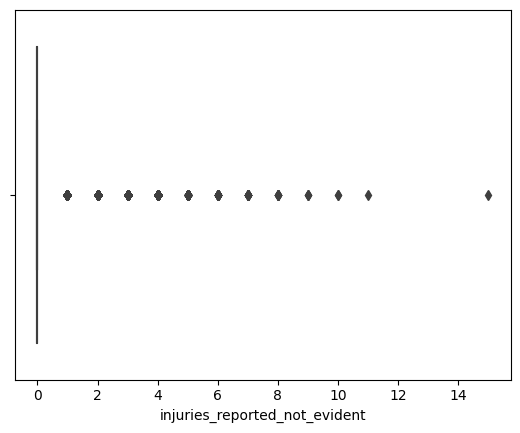

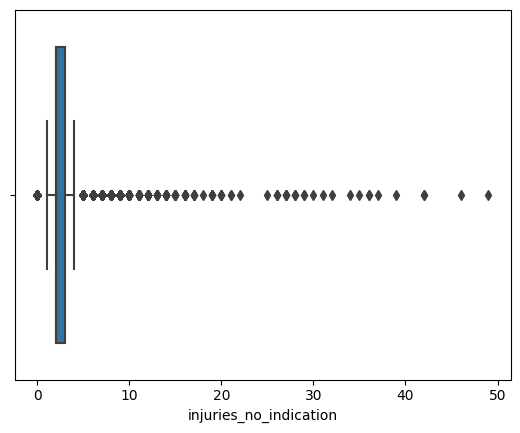

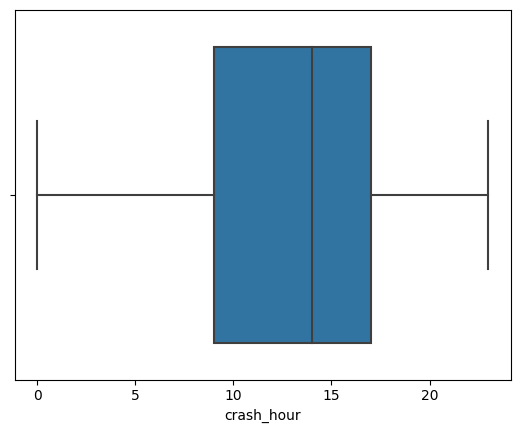

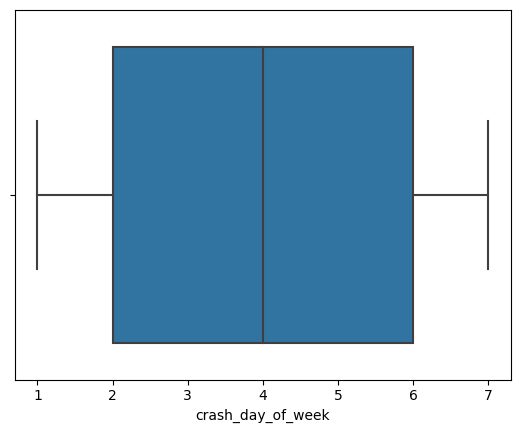

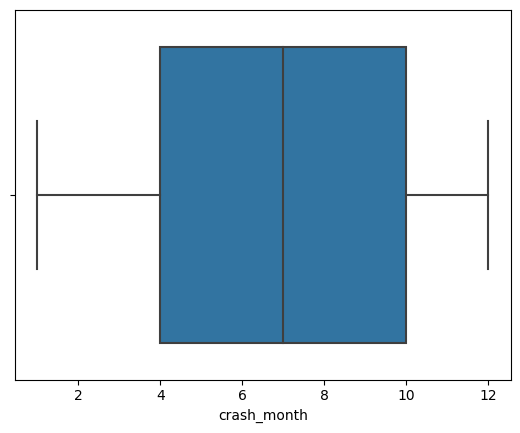

In [14]:
for i in df_num:
    plt.figure()
    sns.boxplot(x=i,data=df_m)

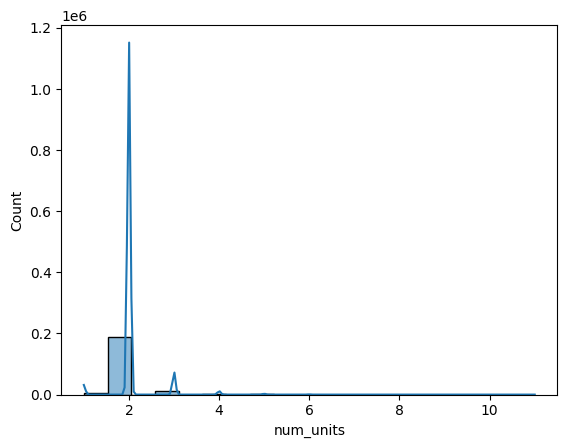

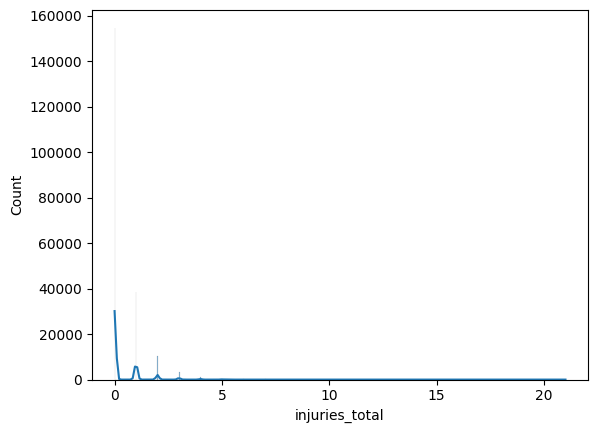

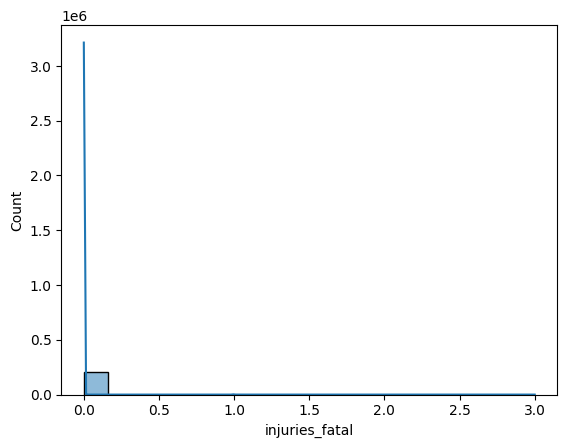

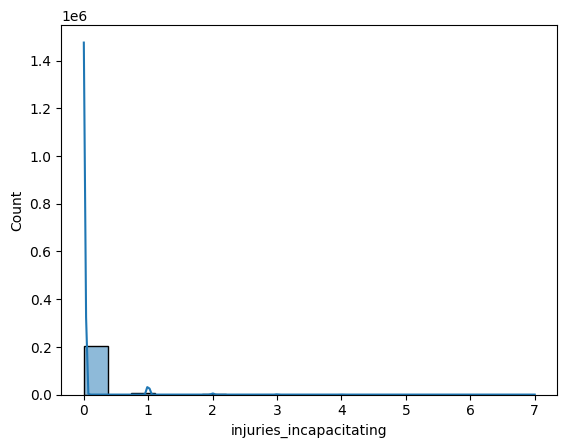

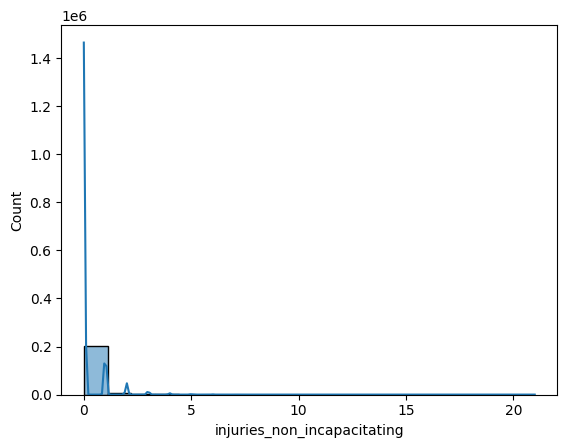

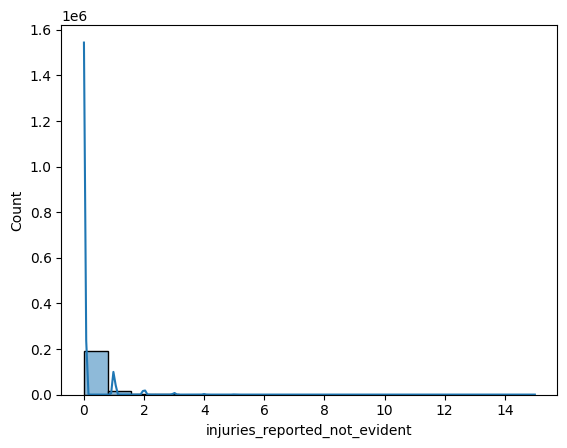

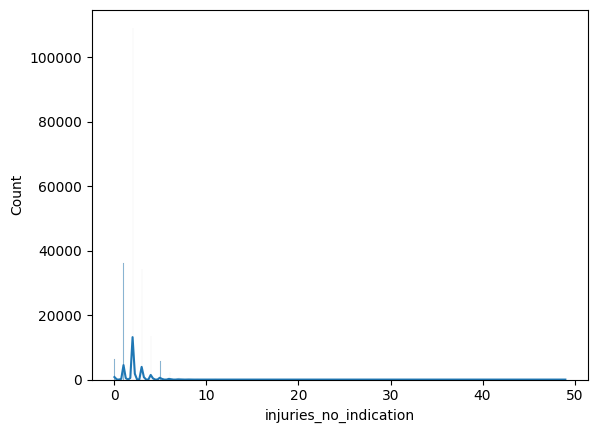

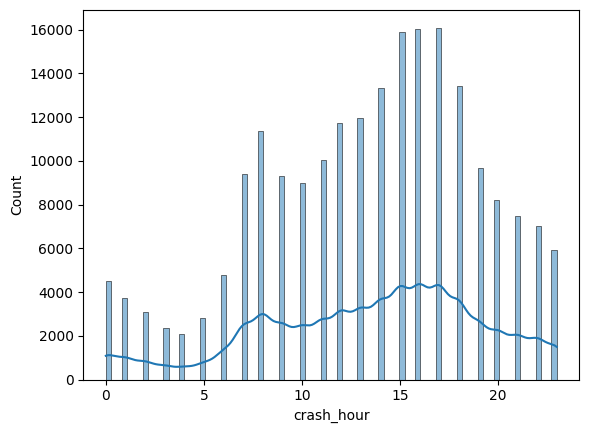

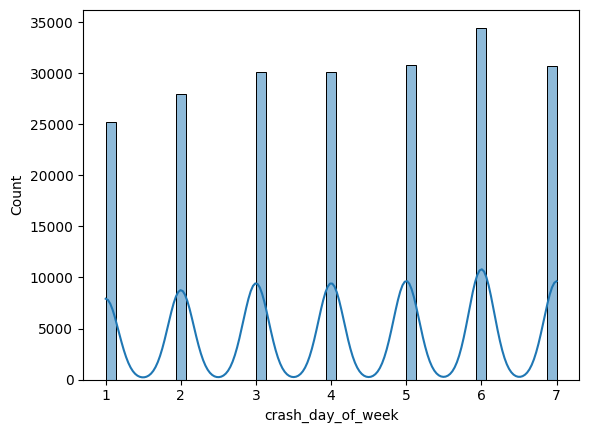

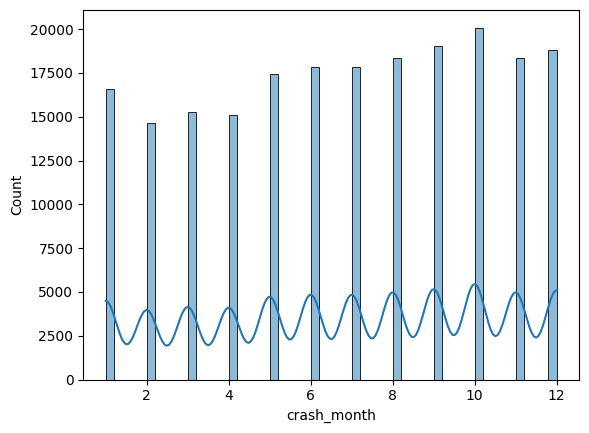

In [15]:
for i in df_num:
    plt.figure()
    sns.histplot(x=i,data=df_m,kde=True)

In [16]:
# df_num_cols=[]
# df_num_cols.extend([df_num_corr(df[""]>0.3)].index.values)
# df_num_cols.extend([df_num_corr(df["first_crash_type"]<-0.3)].index.values)

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
encoded=df_cat.apply(le.fit_transform)

In [18]:
encoded

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,intersection_related_i,damage,prim_contributory_cause,most_severe_injury
0,102748,16,2,3,17,8,3,5,5,1,1,1,36,2
1,110797,16,2,1,17,6,3,0,1,1,1,2,24,2
2,176858,16,2,3,10,15,3,0,1,1,1,1,19,2
3,108613,16,2,3,0,6,3,0,1,0,1,2,36,3
4,113911,16,2,3,10,15,3,5,5,1,1,1,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209301,127603,17,11,5,17,6,3,5,5,1,1,2,36,2
209302,96972,17,2,3,15,8,3,0,1,1,1,2,23,2
209303,150516,16,2,3,9,2,4,0,1,0,0,0,31,1
209304,71982,4,2,3,9,15,3,0,1,0,1,0,38,3


In [19]:
df_m["first_crash_type"].unique()

array(['TURNING', 'REAR END', 'ANGLE', 'FIXED OBJECT', 'REAR TO FRONT',
       'SIDESWIPE SAME DIRECTION', 'SIDESWIPE OPPOSITE DIRECTION',
       'PEDALCYCLIST', 'PEDESTRIAN', 'HEAD ON', 'PARKED MOTOR VEHICLE',
       'OTHER NONCOLLISION', 'OVERTURNED', 'OTHER OBJECT', 'REAR TO SIDE',
       'ANIMAL', 'TRAIN', 'REAR TO REAR'], dtype=object)

In [20]:
def remove_outliers(df,columns):
    for col in columns:
        q1=df[col].quantile(0.25) #first quartile 25th percentile
        q3=df[col].quantile(0.75) #third quartile 75th percentile
        iqr=q3-q1
        lower_bound=q1-1.5*iqr
        upper_bound=q3+1.5*iqr
        df=df[(df[col]>=lower_bound)&(df[col]<=upper_bound)]
        return df

In [21]:
columns_to_check = ["num_units","injuries_total","injuries_fatal","injuries_incapacitating","injuries_non_incapacitating","injuries_reported_not_evident","injuries_no_indication","crash_hour","crash_day_of_week","crash_month"]


df_no_outliers = remove_outliers(df_num, columns_to_check)

print("Original DataFrame:")
print(df_num.shape)
print("\nDataFrame after Outlier Treatment:")
print(df_no_outliers.shape)

Original DataFrame:
(209306, 10)

DataFrame after Outlier Treatment:
(189366, 10)


In [22]:
df_cat.shape

(209306, 14)

In [23]:
columns_to_scale=["num_units","injuries_total","injuries_fatal","injuries_incapacitating","injuries_non_incapacitating","injuries_reported_not_evident","injuries_no_indication","crash_hour","crash_day_of_week","crash_month"]
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
df_standard_scaled = df_no_outliers.copy()
df_standard_scaled[columns_to_scale] = standard_scaler.fit_transform(df_no_outliers[columns_to_scale])

In [24]:
df_num.describe()

,num_units,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
count,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000
mean,2.063300,0.382717,0.001859,0.038102,0.221241,0.121516,2.244002,13.373047,4.144024,6.771822
std,0.396012,0.799720,0.047502,0.233964,0.614960,0.450865,1.241175,5.603830,1.966864,3.427593
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,9.000000,2.000000,4.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,14.000000,4.000000,7.000000
75%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,17.000000,6.000000,10.000000
max,11.000000,21.000000,3.000000,7.000000,21.000000,15.000000,49.000000,23.000000,7.000000,12.000000


In [25]:
df_f_cat=encoded.loc[df_no_outliers.index,:]

In [26]:
final_df=pd.concat([df_f_cat,df_standard_scaled],axis=1)
final_df

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,num_units,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,102748,16,2,3,17,8,3,5,5,1,...,0.0,-0.469382,-0.033298,-0.155825,-0.351424,-0.263321,0.661536,-0.078914,1.455580,0.065670
1,110797,16,2,1,17,6,3,0,1,1,...,0.0,-0.469382,-0.033298,-0.155825,-0.351424,-0.263321,-0.191185,-2.435715,-1.607319,0.357795
3,108613,16,2,3,0,6,3,0,1,0,...,0.0,6.293022,-0.033298,-0.155825,8.470568,-0.263321,-1.896629,1.008841,-0.075869,0.357795
4,113911,16,2,3,10,15,3,5,5,1,...,0.0,-0.469382,-0.033298,-0.155825,-0.351424,-0.263321,0.661536,0.102379,1.455580,0.357795
6,183440,16,2,3,11,6,3,0,1,1,...,0.0,-0.469382,-0.033298,-0.155825,-0.351424,-0.263321,-0.191185,-0.441498,-0.586352,1.526293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209301,127603,17,11,5,17,6,3,5,5,1,...,0.0,-0.469382,-0.033298,-0.155825,-0.351424,-0.263321,-0.191185,-0.078914,-0.075869,0.649919
209302,96972,17,2,3,15,8,3,0,1,1,...,0.0,-0.469382,-0.033298,-0.155825,-0.351424,-0.263321,-0.191185,0.102379,-0.586352,0.065670
209303,150516,16,2,3,9,2,4,0,1,0,...,0.0,2.235579,-0.033298,9.216267,-0.351424,-0.263321,-1.896629,-0.078914,-0.075869,0.942044
209304,71982,4,2,3,9,15,3,0,1,0,...,0.0,0.883099,-0.033298,-0.155825,1.412974,-0.263321,-1.043907,0.283671,-1.096836,-0.226454


In [27]:
final_df.shape

(189366, 24)

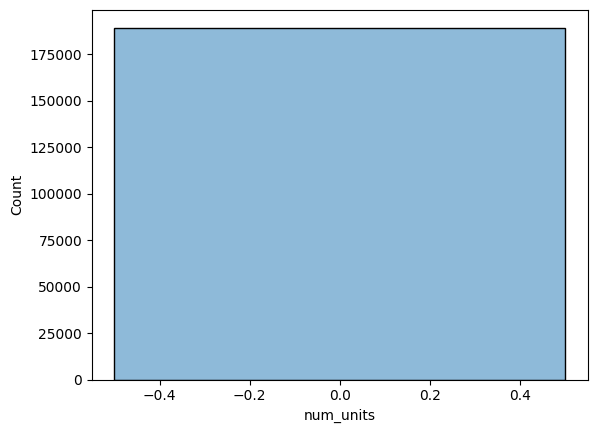

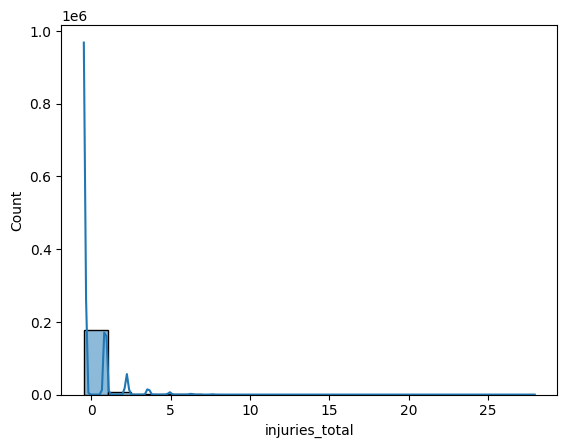

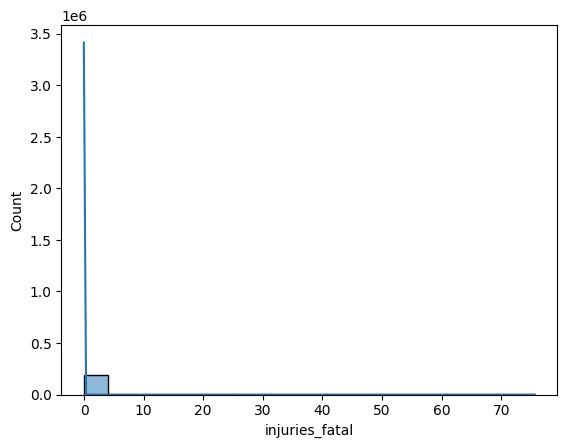

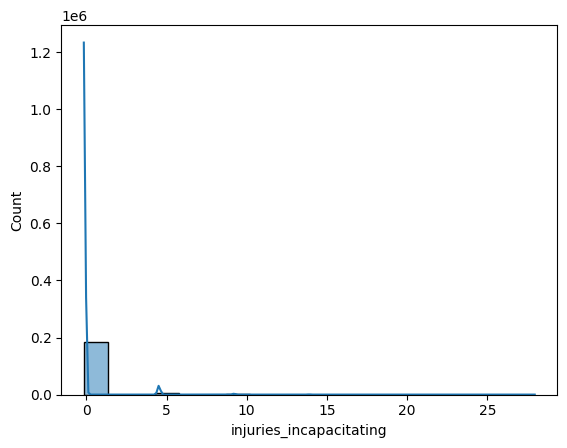

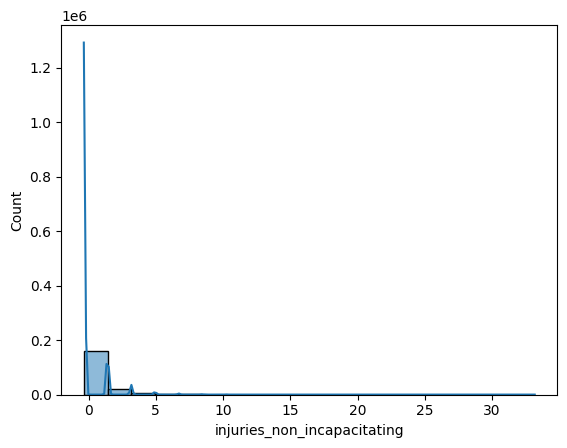

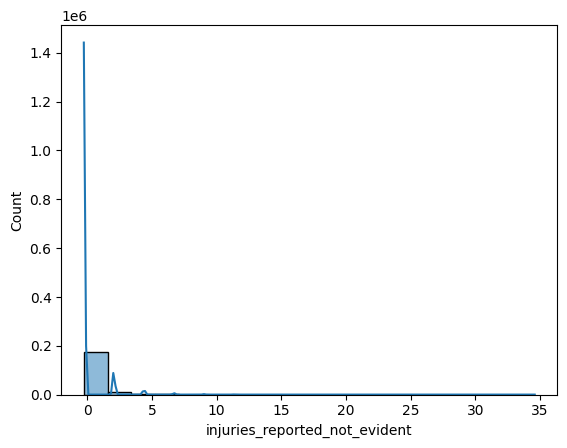

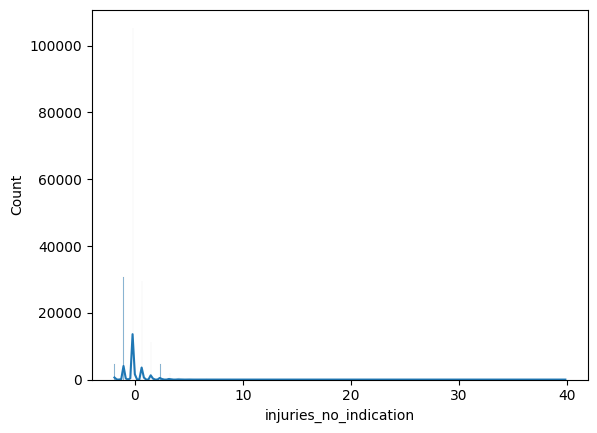

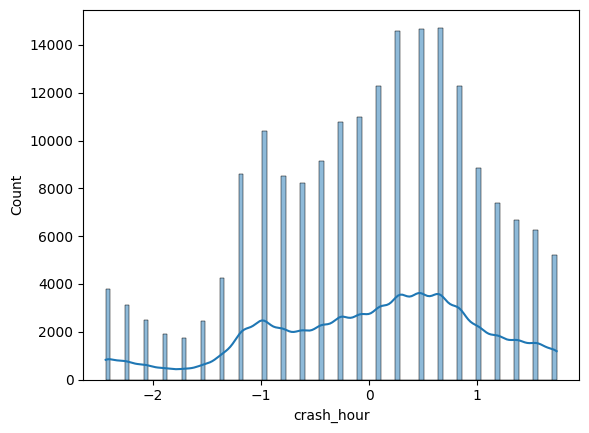

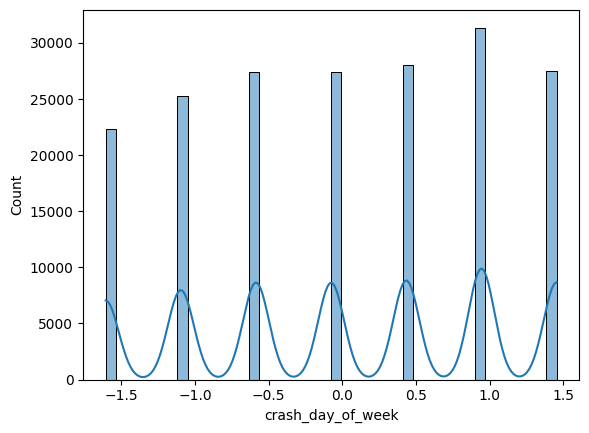

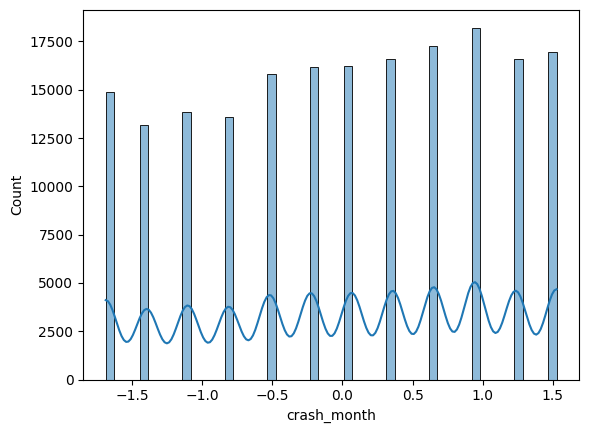

In [28]:
for i in df_standard_scaled:
    plt.figure()
    sns.histplot(x=i,data=df_standard_scaled,kde=True)

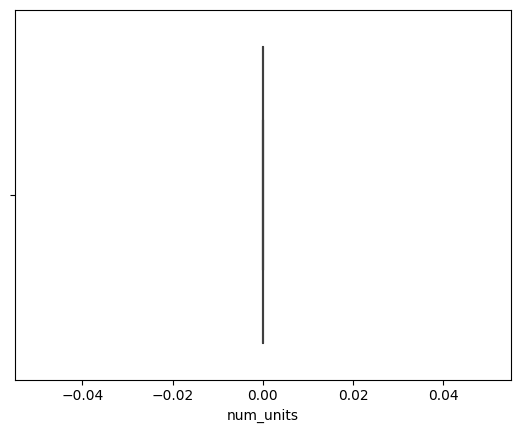

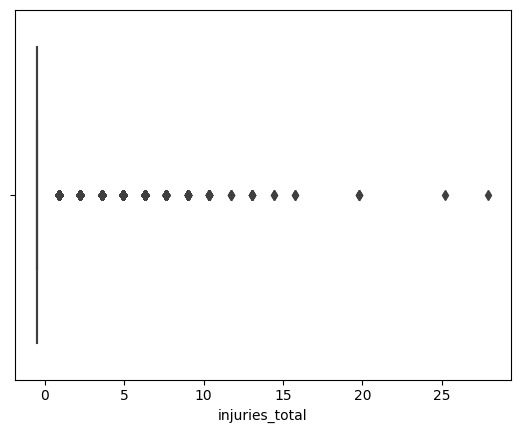

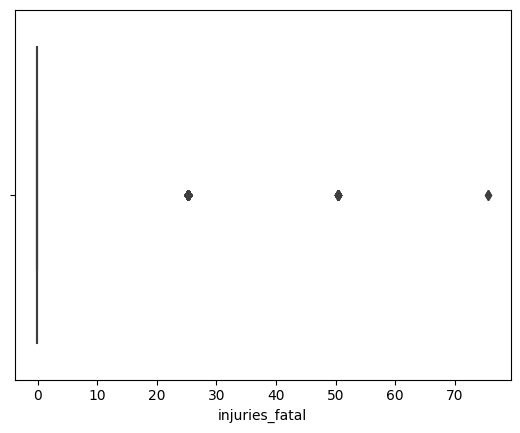

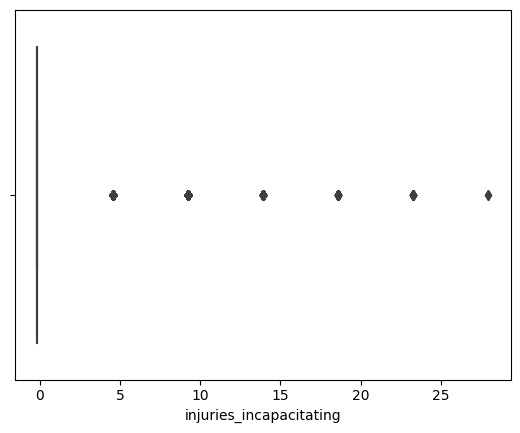

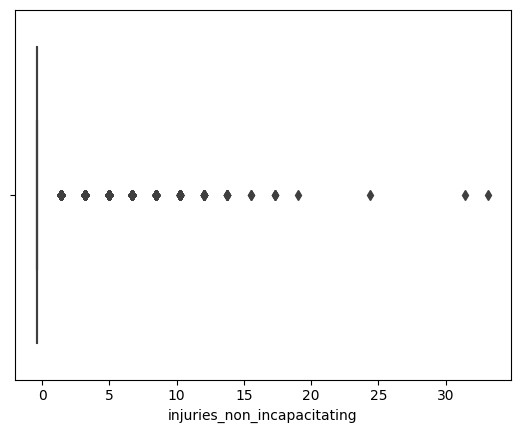

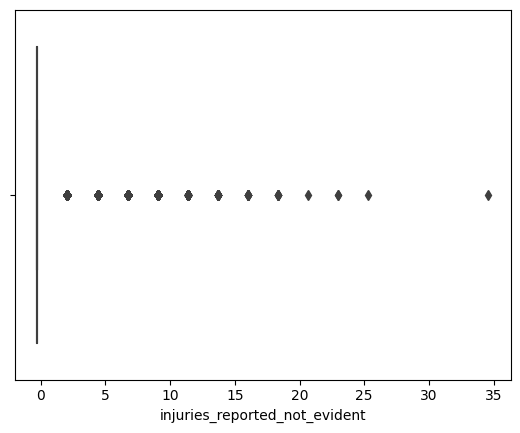

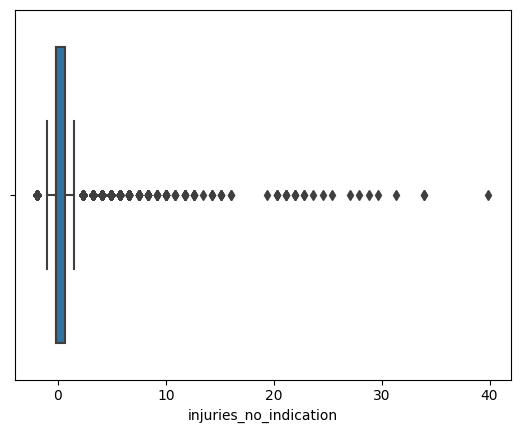

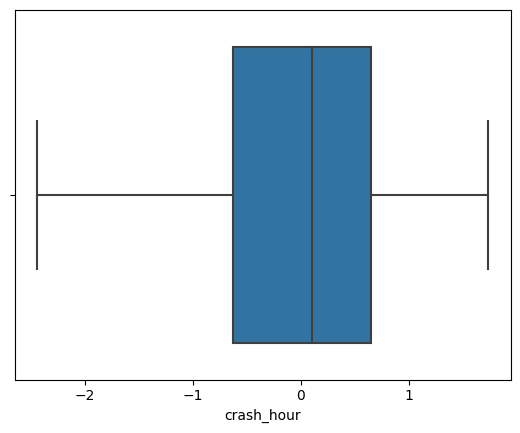

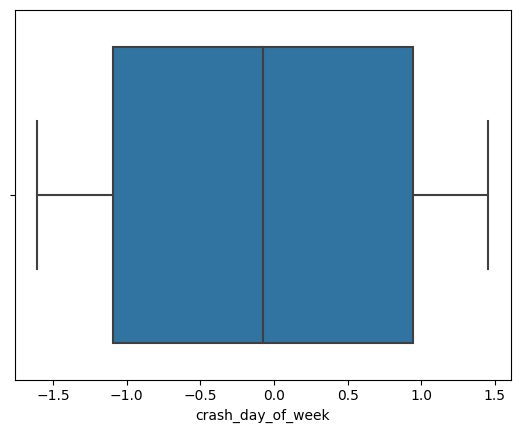

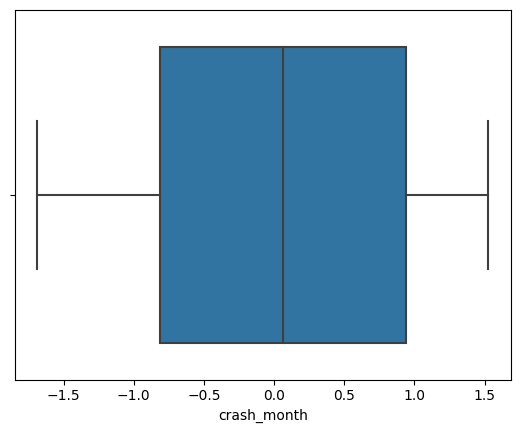

In [29]:
for i in df_standard_scaled:
    plt.figure()
    sns.boxplot(x=i,data=df_standard_scaled)

In [30]:
x=final_df.drop("crash_type",axis=1)
y=final_df["crash_type"]

In [31]:
x

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,intersection_related_i,...,num_units,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,102748,16,2,3,17,8,3,5,5,1,...,0.0,-0.469382,-0.033298,-0.155825,-0.351424,-0.263321,0.661536,-0.078914,1.455580,0.065670
1,110797,16,2,1,17,6,3,0,1,1,...,0.0,-0.469382,-0.033298,-0.155825,-0.351424,-0.263321,-0.191185,-2.435715,-1.607319,0.357795
3,108613,16,2,3,0,6,3,0,1,1,...,0.0,6.293022,-0.033298,-0.155825,8.470568,-0.263321,-1.896629,1.008841,-0.075869,0.357795
4,113911,16,2,3,10,15,3,5,5,1,...,0.0,-0.469382,-0.033298,-0.155825,-0.351424,-0.263321,0.661536,0.102379,1.455580,0.357795
6,183440,16,2,3,11,6,3,0,1,1,...,0.0,-0.469382,-0.033298,-0.155825,-0.351424,-0.263321,-0.191185,-0.441498,-0.586352,1.526293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209301,127603,17,11,5,17,6,3,5,5,1,...,0.0,-0.469382,-0.033298,-0.155825,-0.351424,-0.263321,-0.191185,-0.078914,-0.075869,0.649919
209302,96972,17,2,3,15,8,3,0,1,1,...,0.0,-0.469382,-0.033298,-0.155825,-0.351424,-0.263321,-0.191185,0.102379,-0.586352,0.065670
209303,150516,16,2,3,9,2,4,0,1,0,...,0.0,2.235579,-0.033298,9.216267,-0.351424,-0.263321,-1.896629,-0.078914,-0.075869,0.942044
209304,71982,4,2,3,9,15,3,0,1,1,...,0.0,0.883099,-0.033298,-0.155825,1.412974,-0.263321,-1.043907,0.283671,-1.096836,-0.226454


In [32]:
y

0         1
1         1
3         0
4         1
6         1
         ..
209301    1
209302    1
209303    0
209304    0
209305    1
Name: crash_type, Length: 189366, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [34]:
x_train

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,intersection_related_i,...,num_units,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
39166,90943,16,2,3,17,8,3,0,1,1,...,0.0,-0.469382,-0.033298,-0.155825,-0.351424,-0.263321,0.661536,-0.078914,1.455580,0.065670
119641,21424,16,2,3,17,2,3,4,1,1,...,0.0,-0.469382,-0.033298,-0.155825,-0.351424,-0.263321,0.661536,-0.622791,-1.607319,-1.394952
27486,13252,15,2,1,0,6,3,1,1,1,...,0.0,3.588060,-0.033298,-0.155825,4.941771,-0.263321,-1.043907,1.371425,0.945097,-1.687077
164096,179857,16,7,1,0,8,4,6,1,1,...,0.0,-0.469382,-0.033298,-0.155825,-0.351424,-0.263321,-0.191185,-1.891838,-0.075869,1.526293
95715,70221,16,2,3,17,11,3,0,1,1,...,0.0,0.883099,-0.033298,-0.155825,1.412974,-0.263321,-0.191185,0.646256,-0.586352,-0.518579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132559,44207,4,2,3,10,2,3,0,1,1,...,0.0,-0.469382,-0.033298,-0.155825,-0.351424,-0.263321,-0.191185,0.283671,0.945097,-0.810703
114668,76645,16,7,3,9,10,3,6,1,1,...,0.0,0.883099,-0.033298,4.530221,-0.351424,-0.263321,-0.191185,-1.166668,-1.607319,-0.226454
145882,57159,16,2,1,17,15,3,6,1,1,...,0.0,-0.469382,-0.033298,-0.155825,-0.351424,-0.263321,-0.191185,1.734010,0.945097,-0.518579
162416,159612,16,2,3,9,8,3,0,1,1,...,0.0,0.883099,-0.033298,-0.155825,-0.351424,2.060695,-1.043907,-0.985376,-0.586352,1.234169


In [35]:
y_train

39166     0
119641    1
27486     0
164096    0
95715     0
         ..
132559    1
114668    0
145882    1
162416    0
134869    1
Name: crash_type, Length: 151492, dtype: int64

In [36]:
x_test

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,intersection_related_i,...,num_units,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
107616,133397,16,3,3,10,6,3,0,1,1,...,0.0,-0.469382,-0.033298,-0.155825,-0.351424,-0.263321,-0.191185,0.646256,0.945097,0.649919
42790,105379,16,2,1,17,6,3,0,1,1,...,0.0,-0.469382,-0.033298,-0.155825,-0.351424,-0.263321,-0.191185,1.552718,-0.586352,0.357795
170989,166207,15,11,5,0,2,3,5,5,1,...,0.0,-0.469382,-0.033298,-0.155825,-0.351424,-0.263321,0.661536,-2.254422,0.945097,1.234169
158860,54098,16,10,3,0,2,4,6,1,1,...,0.0,-0.469382,-0.033298,-0.155825,-0.351424,-0.263321,2.366979,-0.078914,1.455580,-0.810703
173828,97383,4,2,3,8,6,3,0,1,1,...,0.0,-0.469382,-0.033298,-0.155825,-0.351424,-0.263321,-0.191185,0.283671,-1.096836,0.065670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21168,8695,16,2,3,10,2,3,0,1,1,...,0.0,-0.469382,-0.033298,-0.155825,-0.351424,-0.263321,-0.191185,-1.166668,0.434614,-1.687077
135695,123086,15,2,3,10,8,3,0,1,1,...,0.0,-0.469382,-0.033298,-0.155825,-0.351424,-0.263321,-0.191185,-0.804083,-1.607319,0.649919
95195,135378,16,2,3,10,8,3,0,1,1,...,0.0,-0.469382,-0.033298,-0.155825,-0.351424,-0.263321,-0.191185,0.827548,-0.075869,0.649919
99573,136562,16,2,3,15,10,3,0,1,1,...,0.0,-0.469382,-0.033298,-0.155825,-0.351424,-0.263321,-0.191185,-1.166668,0.945097,0.649919


In [37]:
y_test

107616    1
42790     1
170989    1
158860    0
173828    1
         ..
21168     1
135695    1
95195     1
99573     1
37913     1
Name: crash_type, Length: 37874, dtype: int64

In [38]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [39]:
log_reg.score(x_train,y_train)

0.6145671058537745

In [40]:
from sklearn.model_selection import cross_val_score
cf = cross_val_score(log_reg, x_train, y_train, scoring="accuracy", cv=5).mean()
cf


0.7900359952639693

In [51]:
from sklearn.model_selection import cross_val_score
cf = cross_val_score(log_reg, x_test, y_test, scoring="accuracy", cv=5).mean()
cf


0.60820085388523

In [41]:
log_reg.score(x_test,y_test)

0.6144056608755347

In [60]:
y_pred=log_reg.predict(x_test)
y_pred

array([1, 1, 1, ..., 1, 1, 0])

In [43]:
from sklearn.metrics import accuracy_score
acc_score=accuracy_score(y_pred,y_test)
acc_score

0.6144056608755347

In [44]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(x_train,y_train)

Ridge()

In [45]:
ridge.score(x_train,y_train)

0.4623262944342489

In [46]:
ridge.score(x_test,y_test)

0.4631727795360767

In [47]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred,y_test)
cm

array([[ 1869,   962],
       [13642, 21401]])

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.12      0.66      0.20      2831
           1       0.96      0.61      0.75     35043

    accuracy                           0.61     37874
   macro avg       0.54      0.64      0.47     37874
weighted avg       0.89      0.61      0.71     37874



<Axes: >

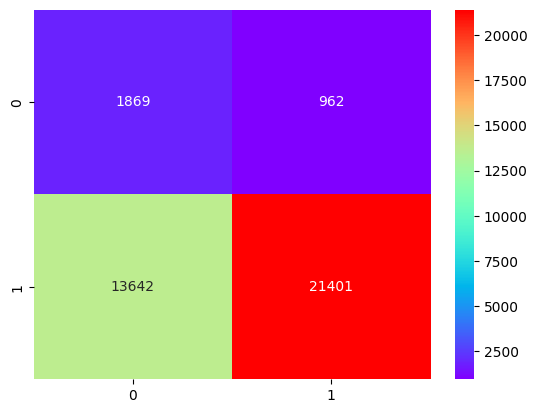

In [49]:
sns.heatmap(cm,annot=True,cmap="rainbow",fmt="d")

In [50]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10],  # Regularization strength
    'solver': ['liblinear', 'lbfgs'],  # Optimization solvers
    'max_iter': [100, 200, 300]  # Maximum iterations
}

# Instantiate GridSearchCV
gdf = GridSearchCV(estimator=log_reg, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit to the training data
gdf.fit(x_train, y_train)

# Get the best parameters and best score
print("Best Parameters:", gdf.best_params_)
print("Best Score:", gdf.best_score_)


Best Parameters: {'C': 0.01, 'max_iter': 100, 'solver': 'liblinear'}
Best Score: 0.8354038583798091


In [57]:
# Define K-Fold
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate model using cross_val_score
scores = cross_val_score(log_reg, x, y, cv=kf, scoring='accuracy').mean()
scores

0.6886773458365544

In [58]:
gdf.score(x_train,y_train)

0.8373115412034959

In [59]:
gdf.score(x_test,y_test)

0.8358504514970693